In [ ]:
!pip install -q google_play_scraper

In [ ]:
!pip install -q transformers #sentiment
!pip install -q plotly-express #data visualization

In [ ]:
!pip install gensim
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install pyyaml==5.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import string
import re
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [ ]:
kfc_projectUS = reviews_all('com.kfc.us.mobile', sleep_milliseconds= 0, lang = 'en', country = 'US', sort = Sort.NEWEST)

In [ ]:
df_US = pd.json_normalize(kfc_projectUS)

In [ ]:
df_US.head(2000)

reviewId  \
0    b16b2e4e-5035-4e20-8cca-cb471a574f82   
1    1d802844-3d7a-4294-a8e0-c60fdc2de262   
2    d2becd16-9340-4c63-b698-8e8fb126469a   
3    6cf9caeb-39ab-44b1-8704-9eaf5c546eec   
4    ac650899-73ad-401c-af1c-14de4ff96587   
..                                    ...   
592  cc0281e3-e164-4a99-8082-dff832b86e42   
593  74092a72-c63e-42fd-ab61-749854881d04   
594  5597d7c3-b51a-4b94-8be8-dcfa2bb1047c   
595  c4425a78-e74c-478b-bd0a-0bff719d87ed   
596  e10c44ad-20b5-4c60-a0d9-85e431866866   

                                 userName  \
0                            Alicia Weiss   
1                            MARIA V WADE   
2                          Jay Parangalan   
3                            Jef Lombardi   
4                               dan scamp   
..                                    ...   
592                      Daniel Andriusis   
593                          Tyler Newman   
594                          Mason Jensen   
595  William Darnell Sr (Grandpa Swagger)   
596                         DANGER _1300B   

                                             userImage  \
0    https://play-lh.googleusercontent.com/a/ACg8oc...   
1    https://play-lh.googleusercontent.com/a-/ALV-U...   
2    https://play-lh.googleusercontent.com/a/ACg8oc...   
3    https://play-lh.googleusercontent.com/a-/ALV-U...   
4    https://play-lh.googleusercontent.com/a-/ALV-U...   
..                                                 ...   
592  https://play-lh.googleusercontent.com/a/ACg8oc...   
593  https://play-lh.googleusercontent.com/a-/ALV-U...   
594  https://play-lh.googleusercontent.com/a-/ALV-U...   
595  https://play-lh.googleusercontent.com/a-/ALV-U...   
596  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                               content  score  thumbsUpCount  \
0                                                 Good      5              0   
1    We need more KFaC fast food restaurant near by...      3              0   
2    The last 6 times I used this app, 2x it froze ...      1              0   
3    This app doesn't WORK They want my business, t...      1              0   
4                                     App has clitches      3              0   
..                                                 ...    ...            ...   
592  Downloaded the app but I'm not getting my free...      1              2   
593  Trash. Wouldn't let me redeem a reward because...      1              2   
594  i am constantly bombarded by ads for this app,...      1              1   
595                         KFC, are you kiddy me, I t      1              0   
596  None of the restaurants in my neighborhood acc...      1              0   

    reviewCreatedVersion                  at replyContent repliedAt appVersion  
0               2024.2.0 2024-05-05 05:43:46         None       NaT   2024.2.0  
1                   None 2024-05-05 02:25:58         None       NaT       None  
2               2024.4.0 2024-05-05 01:42:32         None       NaT   2024.4.0  
3               2024.4.0 2024-05-04 21:29:17         None       NaT   2024.4.0  
4               2024.4.0 2024-05-04 21:24:13         None       NaT   2024.4.0  
..                   ...                 ...          ...       ...        ...  
592            2023.12.0 2024-01-24 20:57:22         None       NaT  2023.12.0  
593            2023.12.0 2024-01-24 18:10:21         None       NaT  2023.12.0  
594            2023.12.0 2024-01-24 11:59:25         None       NaT  2023.12.0  
595            2023.12.0 2024-01-24 06:14:28         None       NaT  2023.12.0  
596            2023.12.0 2024-01-24 03:25:32         None       NaT  2023.12.0  

[597 rows x 11 columns]

In [ ]:
df_US.describe()

score  thumbsUpCount                             at  \
count  597.000000     597.000000                            597   
mean     2.190955       3.144054  2024-03-15 10:16:59.132328448   
min      1.000000       0.000000            2024-01-24 03:25:32   
25%      1.000000       0.000000            2024-02-15 23:27:45   
50%      1.000000       0.000000            2024-03-17 16:47:11   
75%      4.000000       0.000000            2024-04-11 15:16:26   
max      5.000000     351.000000            2024-05-05 05:43:46   
std      1.632427      23.901560                            NaN   

                 repliedAt  
count                    2  
mean   2021-12-04 21:42:59  
min    2021-12-02 01:22:09  
25%    2021-12-03 11:32:34  
50%    2021-12-04 21:42:59  
75%    2021-12-06 07:53:24  
max    2021-12-07 18:03:49  
std                    NaN

In [ ]:
df_US.isnull().sum()

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion    117
at                        0
replyContent            595
repliedAt               595
appVersion              117
dtype: int64

In [ ]:
df_US.isnull().sum()/ len(df_US)*100

reviewId                 0.000000
userName                 0.000000
userImage                0.000000
content                  0.000000
score                    0.000000
thumbsUpCount            0.000000
reviewCreatedVersion    19.597990
at                       0.000000
replyContent            99.664992
repliedAt               99.664992
appVersion              19.597990
dtype: float64

<ipython-input-19-6e9d4c5825f6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'score', data = df_US, palette = 'deep')


<Axes: xlabel='score', ylabel='count'>

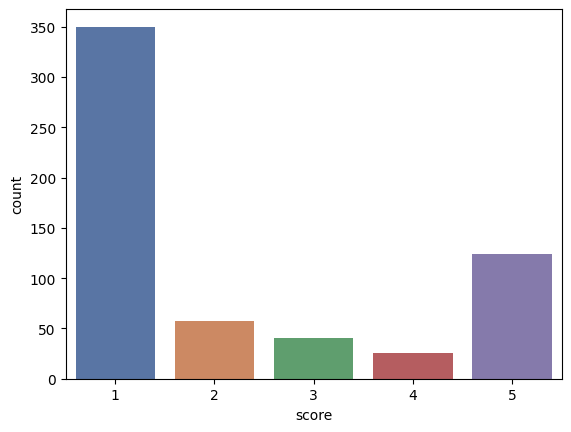

In [ ]:
sns.countplot(x = 'score', data = df_US, palette = 'deep')

In [ ]:
df_US['reviewCreatedVersion'].value_counts()

reviewCreatedVersion
2024.3.0     147
2024.1.0     125
2024.2.0      56
2023.12.0     48
2024.2.1      41
2024.4.0      34
2023.10.0      8
2023.11.0      7
2023.6.1       2
2023.1.0       2
2023.7.0       2
2023.2.0       1
2023.3.1       1
2023.1.3       1
2022.2.4       1
2022.3.5       1
2022.2.1       1
2022.1.2       1
2022.1.0       1
Name: count, dtype: int64

In [ ]:
df_US['Sentiment'] = df_US['score'].apply(lambda rating : 'neutral' if rating == 3 else 'positive' if rating > 3 else 'negative')

<Axes: xlabel='Sentiment', ylabel='count'>

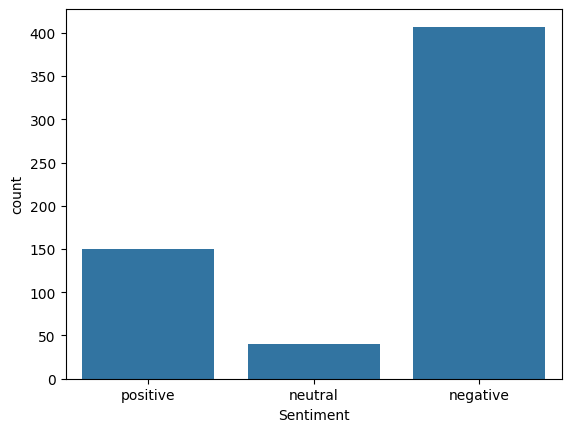

In [ ]:
sns.countplot(x = 'Sentiment', data = df_US)

In [ ]:
neutral_reviews_index = df_US[df_US['Sentiment']=='neutral'].index

df_US = df_US.drop(neutral_reviews_index)

df_US['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

Exception ignored in: <function _xla_gc_callback at 0x7800e775dbd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
df_US1 = df_US[['content', 'Sentiment']].copy()
df_US1

content Sentiment
0                                                 Good  positive
2    The last 6 times I used this app, 2x it froze ...  negative
3    This app doesn't WORK They want my business, t...  negative
5    Doesn't even work majority of the time, and th...  negative
6           Won't pay their high prices. Good riddance  positive
..                                                 ...       ...
592  Downloaded the app but I'm not getting my free...  negative
593  Trash. Wouldn't let me redeem a reward because...  negative
594  i am constantly bombarded by ads for this app,...  negative
595                         KFC, are you kiddy me, I t  negative
596  None of the restaurants in my neighborhood acc...  negative

[557 rows x 2 columns]

In [ ]:
df_US1.dtypes

content      object
Sentiment    object
dtype: object

In [ ]:
df_US['content'] = df_US['content'].astype('str')

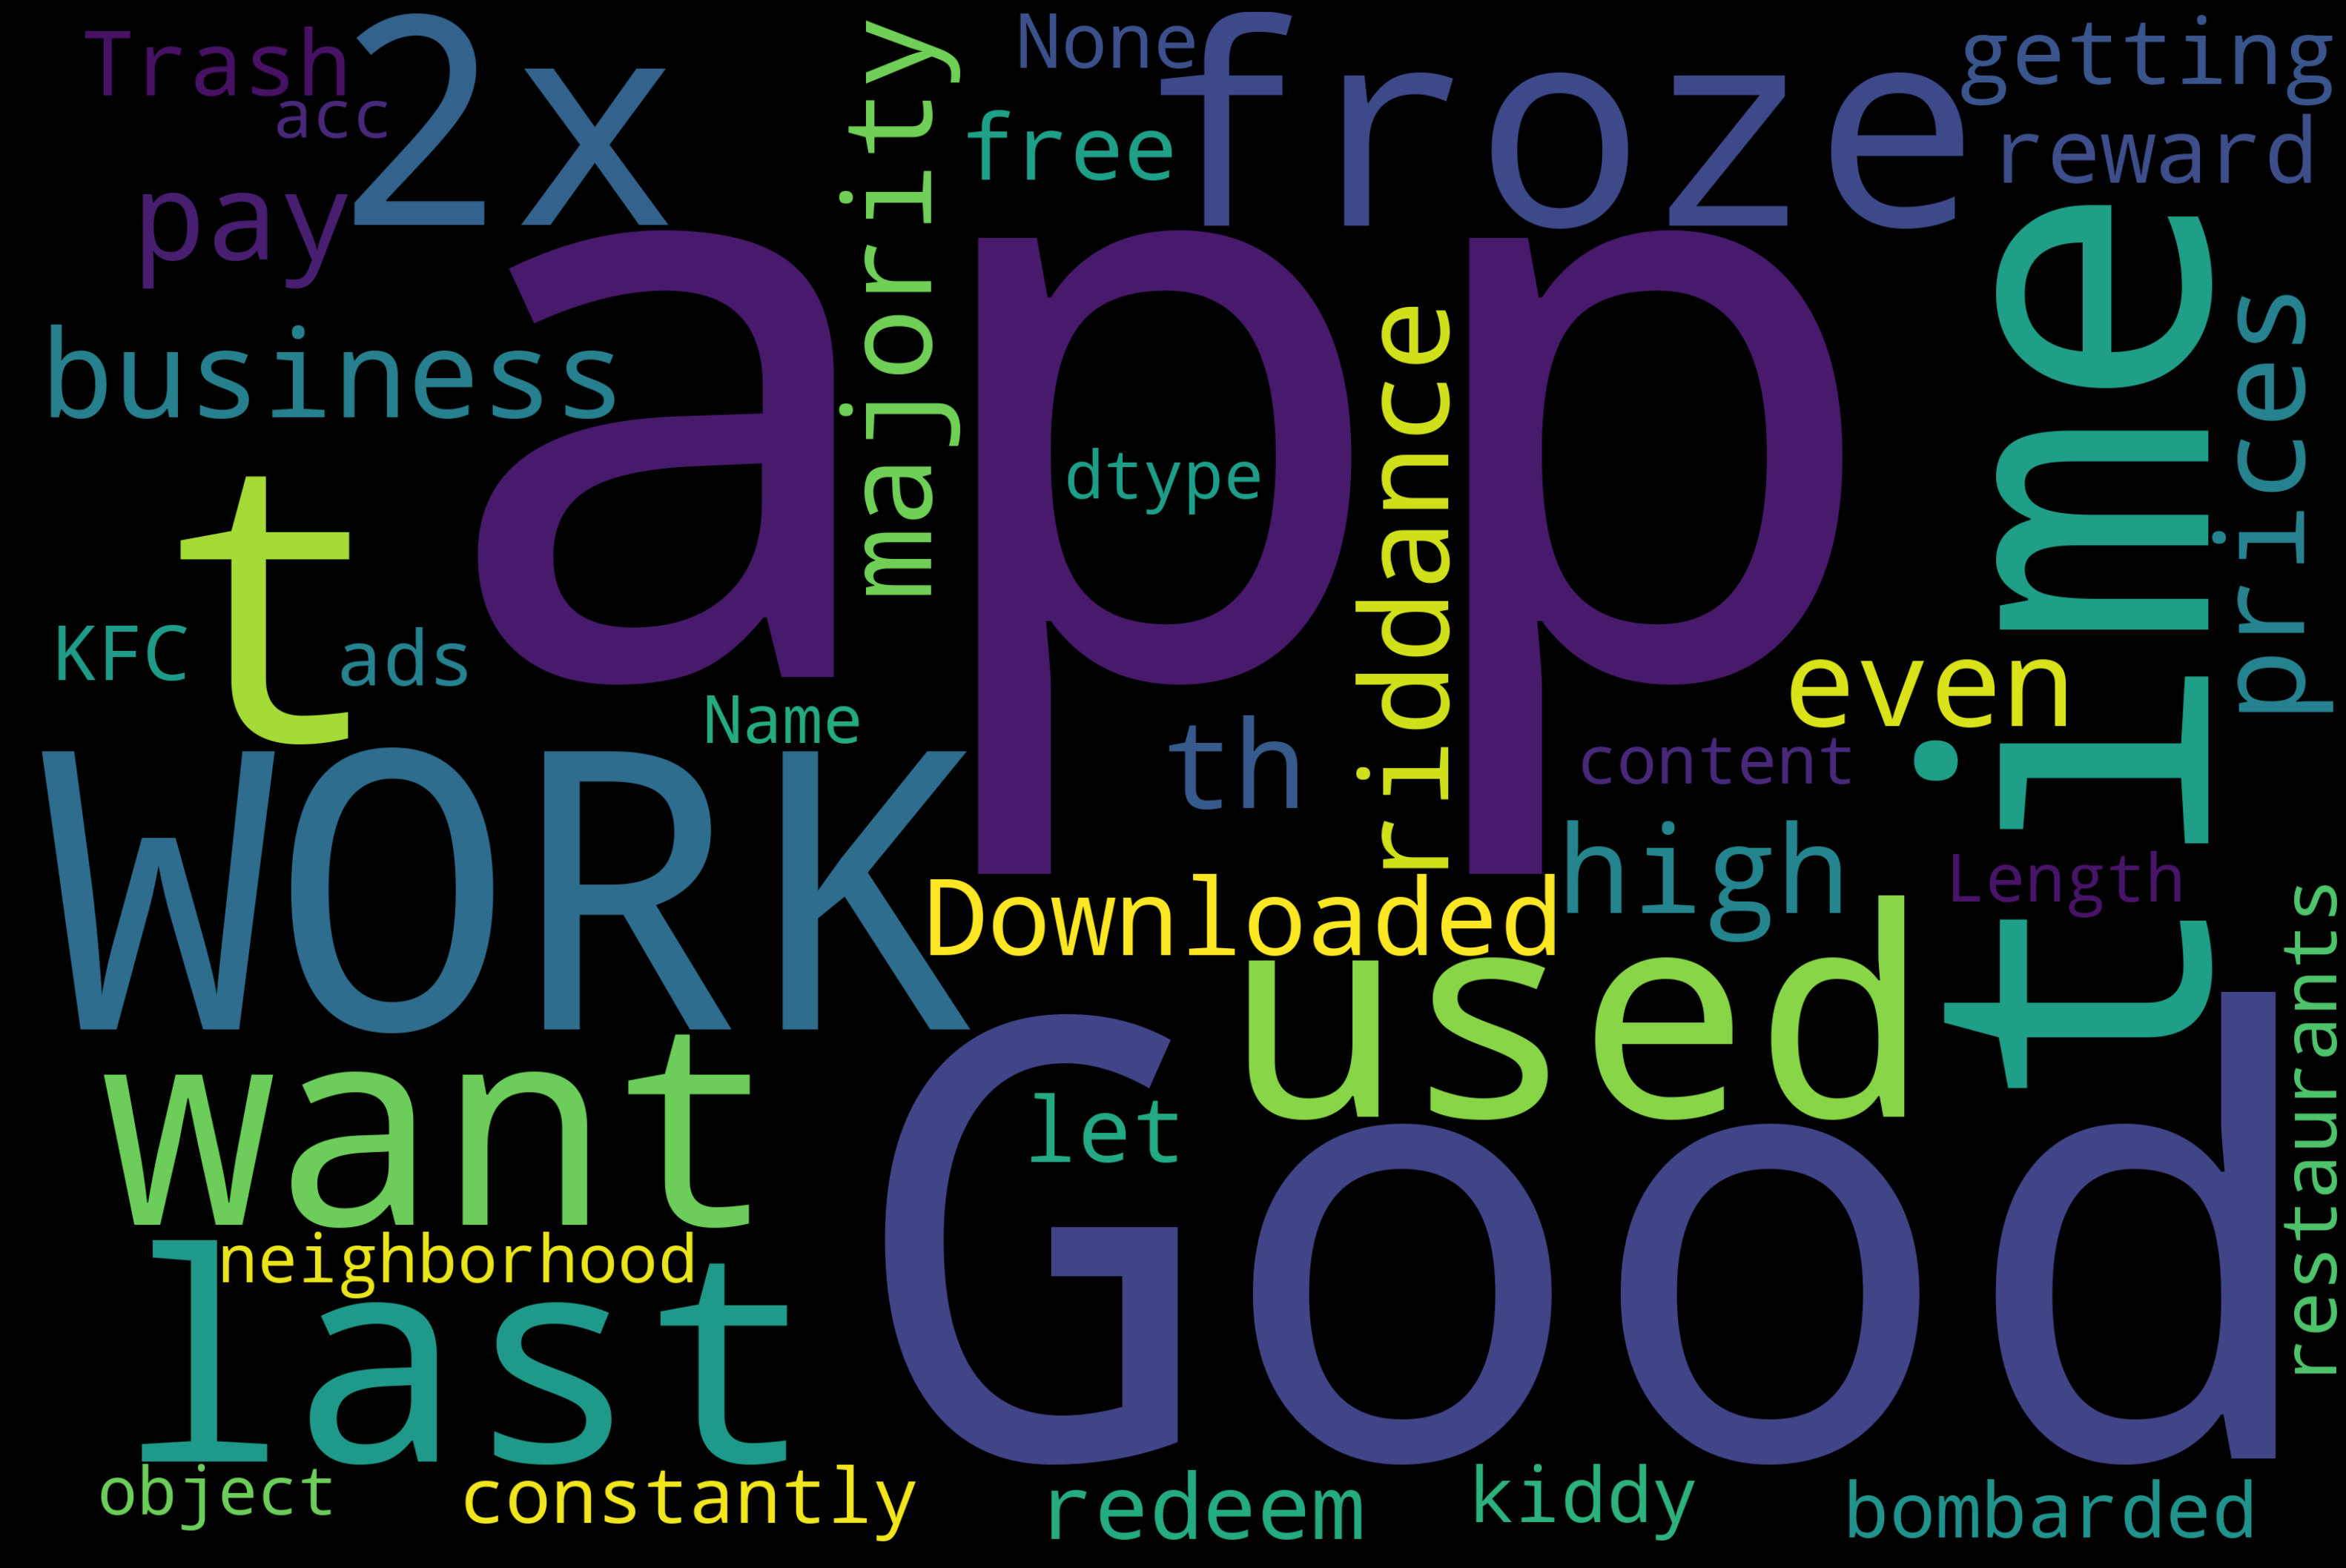

In [ ]:
!pip install wordcloud
# import wordcloud as wc

text = df_US1["content"]

wordcloud = wc.WordCloud(
    width = 3000,
    height = 2000,
    stopwords = wc.STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [ ]:
from bs4 import BeautifulSoup
!pip install lxml
df_US1['content'] = df_US1['content'].apply(lambda review : BeautifulSoup(review, "lxml").text)

df_US1['content']

<ipython-input-29-1c7f03900def>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_US1['content'] = df_US1['content'].apply(lambda review : BeautifulSoup(review, "lxml").text)


0                                                   Good
2      The last 6 times I used this app, 2x it froze ...
3      This app doesn't WORK They want my business, t...
5      Doesn't even work majority of the time, and th...
6             Won't pay their high prices. Good riddance
                             ...                        
592    Downloaded the app but I'm not getting my free...
593    Trash. Wouldn't let me redeem a reward because...
594    i am constantly bombarded by ads for this app,...
595                           KFC, are you kiddy me, I t
596    None of the restaurants in my neighborhood acc...
Name: content, Length: 557, dtype: object

In [ ]:
!pip install nltk
import nltk
from nltk import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df_US1['content'] = df_US1['content'].apply(lambda review: tokenizer.tokenize(review))
df_US1['content']

0                                                 [Good]
2      [The, last, 6, times, I, used, this, app, ,, 2...
3      [This, app, does, n't, WORK, They, want, my, b...
5      [Does, n't, even, work, majority, of, the, tim...
6      [Wo, n't, pay, their, high, prices., Good, rid...
                             ...                        
592    [Downloaded, the, app, but, I, 'm, not, gettin...
593    [Trash., Would, n't, let, me, redeem, a, rewar...
594    [i, am, constantly, bombarded, by, ads, for, t...
595               [KFC, ,, are, you, kiddy, me, ,, I, t]
596    [None, of, the, restaurants, in, my, neighborh...
Name: content, Length: 557, dtype: object

In [ ]:
#ALl English stopwords

!pip install --upgrade nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
np.unique(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him',
       'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn',
       "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma',
       'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't",
       'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o',
       'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours',
       'ourselves', 'out', 'over', 'own', 're', 's', 'same

In [ ]:
negation_list = ["no","nor", "not", "n't"]

stop_words = [word for word in stop_words if word not in negation_list]
np.unique(stop_words)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him',
       'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn',
       "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma',
       'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't",
       'my', 'myself', 'needn', "needn't", 'now', 'o', 'of', 'off', 'on',
       'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out',
       'over', 'own', 're', 's', 'same', 'shan', "shan't",

In [ ]:
# Remove stopwords from each review
df_US1['content'] = df_US1['content'].apply(lambda review: [word for word in review if word not in stop_words])

# Flatten the list of words in each review
all_words = [word for review in df_US['content'] for word in review]

# Get unique words
unique_words = np.unique(all_words)

print(unique_words)

[' ' '!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1'
 '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '?' '@' 'A' 'B' 'C' 'D' 'E' 'F'
 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X'
 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'à' 'í' '\u200d' '♀' '✂' '❤' '⭐'
 '️' '🌄' '🌟' '🌱' '🌷' '🌸' '🌺' '🌾' '🍁' '🍂' '🍄' '🍗' '🍩' '🎟' '🎫' '🏼' '🏿' '👌'
 '👍' '👎' '💓' '💗' '💝' '💞' '💟' '💩' '💯' '📃' '📫' '📬' '📭' '😆' '😊' '😋' '😎' '😒'
 '😕' '😖' '😘' '😠' '😡' '😢' '😤' '🙁' '🙂' '🙃' '🙏' '🤩' '🤷' '🧁']


In [ ]:
# removing puncuations, and removing any dots, dashes, or empty strings

import string

df_US1['content'] = df_US1['content'].apply(lambda review : list(filter(None,[word for word in review if word not in string.punctuation])))

np.unique(df_US1['content'])

array([list(['0000', 'pop']),
       list(['1st', 'time', 'use.', 'Pretty', 'easy', 'use.', 'Chicken', 'mashed', 'potatoes', 'not', 'hot', 'usual.', 'Chicken', 'might', 'set', 'longer', 'usual']),
       list(['3', 'orders', 'messed', 'orders', '3', 'times', 'row', 'missing', 'items', 'etc']),
       list(['4', 'orders', 'made', 'app', 'points', 'still', "n't", 'moved', '0']),
       list(['5', 'stars.', '🌟', '🤩', 'thx.', 'Plz', 'send', 'paper', 'coupons', 'mailbox.', '📬', '📭', '📫', '📃', '🎟', '🎫', '✂️']),
       list(['6', 'different', 'KFCs', 'near', 'none', 'accept', 'orders', 'app.', 'Uninstalled']),
       list(['A', 'good', 'reminder', 'app', 'not', 'use']),
       list(['AWESOME']), list(['Aaaaaaaawessom']), list(['Abm']),
       list(['Absolute', 'garbage.', 'It', 'would', "n't", 'even', 'let', 'input', 'credit', 'card', 'details', 'pay', 'order', 'kept', 'saying', 'input', 'valid', 'credit', 'card.', 'Exact', 'card', 'worked', 'website']),
       list(['Absolutely', 'horrible.'

In [ ]:
#Replace multiple characters with a single space in each string
df_US1['content'] = df_US1['content'].apply(lambda review: list(filter(None,[re.sub(r"[-._'`*]+", '', word) for word in review])))

# Removing single Characters
df_US1['content'] = df_US1['content'].apply(lambda review : list(filter(None,[word for word in review if len(word)>1])))


# Print the result
np.unique(df_US1['content'])

array([list(['0000', 'pop']),
       list(['1st', 'time', 'use', 'Pretty', 'easy', 'use', 'Chicken', 'mashed', 'potatoes', 'not', 'hot', 'usual', 'Chicken', 'might', 'set', 'longer', 'usual']),
       list(['AWESOME']), list(['Aaaaaaaawessom']), list(['Abm']),
       list(['Absolute', 'garbage', 'It', 'would', 'nt', 'even', 'let', 'input', 'credit', 'card', 'details', 'pay', 'order', 'kept', 'saying', 'input', 'valid', 'credit', 'card', 'Exact', 'card', 'worked', 'website']),
       list(['Absolutely', 'horrible', 'There', 'coupon', 'signed', 'sudden', 'signed', 'coupon', 'miraculous', 'disappeared', 'It', 'piece', 'bucket', '10', 'blocked', 'uninstall', 'never', 'use', 'again', 'Absolute', 'garbage']),
       list(['Absolutely', 'junk', 'want', 'treat', 'family', 'dine', 'in', 'There', 'no', 'way', 'even', 'scan', 'receipts', 'get', 'rewards', 'app', 'Also', 'bathroom', 'no', 'soap', 'pickup', 'drivethru', 'person', 'would', 'nt', 'know', 'safe', 'food', 'bathroom', 'use', 'This', 'on

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df_US1['content'] = df_US1['content'].apply(lambda review: [lemmatizer.lemmatize(word) for word in review])
np.unique(df_US1['content'])

[nltk_data] Downloading package wordnet to /root/nltk_data...


array([list(['0000', 'pop']),
       list(['1st', 'time', 'use', 'Pretty', 'easy', 'use', 'Chicken', 'mashed', 'potato', 'not', 'hot', 'usual', 'Chicken', 'might', 'set', 'longer', 'usual']),
       list(['AWESOME']), list(['Aaaaaaaawessom']), list(['Abm']),
       list(['Absolute', 'garbage', 'It', 'would', 'nt', 'even', 'let', 'input', 'credit', 'card', 'detail', 'pay', 'order', 'kept', 'saying', 'input', 'valid', 'credit', 'card', 'Exact', 'card', 'worked', 'website']),
       list(['Absolutely', 'horrible', 'There', 'coupon', 'signed', 'sudden', 'signed', 'coupon', 'miraculous', 'disappeared', 'It', 'piece', 'bucket', '10', 'blocked', 'uninstall', 'never', 'use', 'again', 'Absolute', 'garbage']),
       list(['Absolutely', 'junk', 'want', 'treat', 'family', 'dine', 'in', 'There', 'no', 'way', 'even', 'scan', 'receipt', 'get', 'reward', 'app', 'Also', 'bathroom', 'no', 'soap', 'pickup', 'drivethru', 'person', 'would', 'nt', 'know', 'safe', 'food', 'bathroom', 'use', 'This', 'one', '

In [ ]:
# each review will be represented as one string

df_US1['content']= df_US1['content'].apply(lambda x : " ".join(x))

In [ ]:
df_US1['Sentiment'] = df_US1['Sentiment'].astype('category').cat.codes

df_US1['Sentiment']

0      1
2      0
3      0
5      0
6      1
      ..
592    0
593    0
594    0
595    0
596    0
Name: Sentiment, Length: 557, dtype: int8

In [ ]:
df_US1['content']

0                                                   Good
2      The last time used app 2x froze would not star...
3           This app nt WORK They want business app work
5        Does nt even work majority time clearly nt care
6                     Wo nt pay high price Good riddance
                             ...                        
592    Downloaded app not getting free wrap purchase ...
593    Trash Would nt let redeem reward location not ...
594    constantly bombarded ad app promising free wra...
595                                            KFC kiddy
596    None restaurant neighborhood accept online ord...
Name: content, Length: 557, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X = df_US1['content'] #Independent Variable
y = df_US1['Sentiment'] #Dependent Variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

good = x_train[y_train[y_train == 1].index]
bad = x_train[y_train[y_train == 0].index]

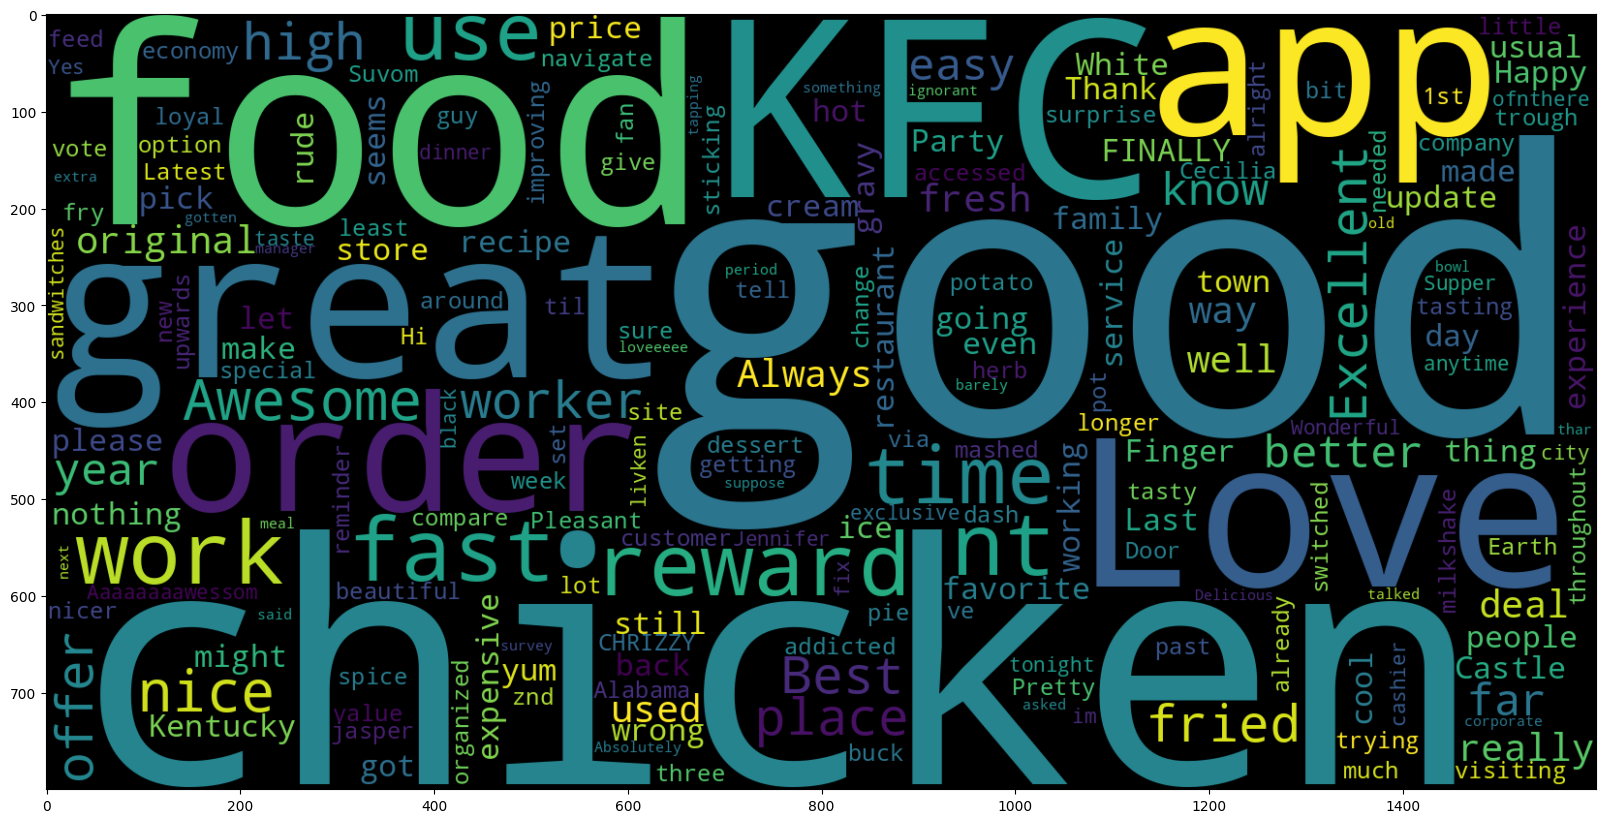

In [ ]:
plt.figure(figsize = (20,20)) # Reviews with Good Ratings

good_reviews = wc.WordCloud(min_font_size = 3 , width = 1600 , height = 800).generate(" ".join(good))

plt.imshow(good_reviews,interpolation = 'bilinear')

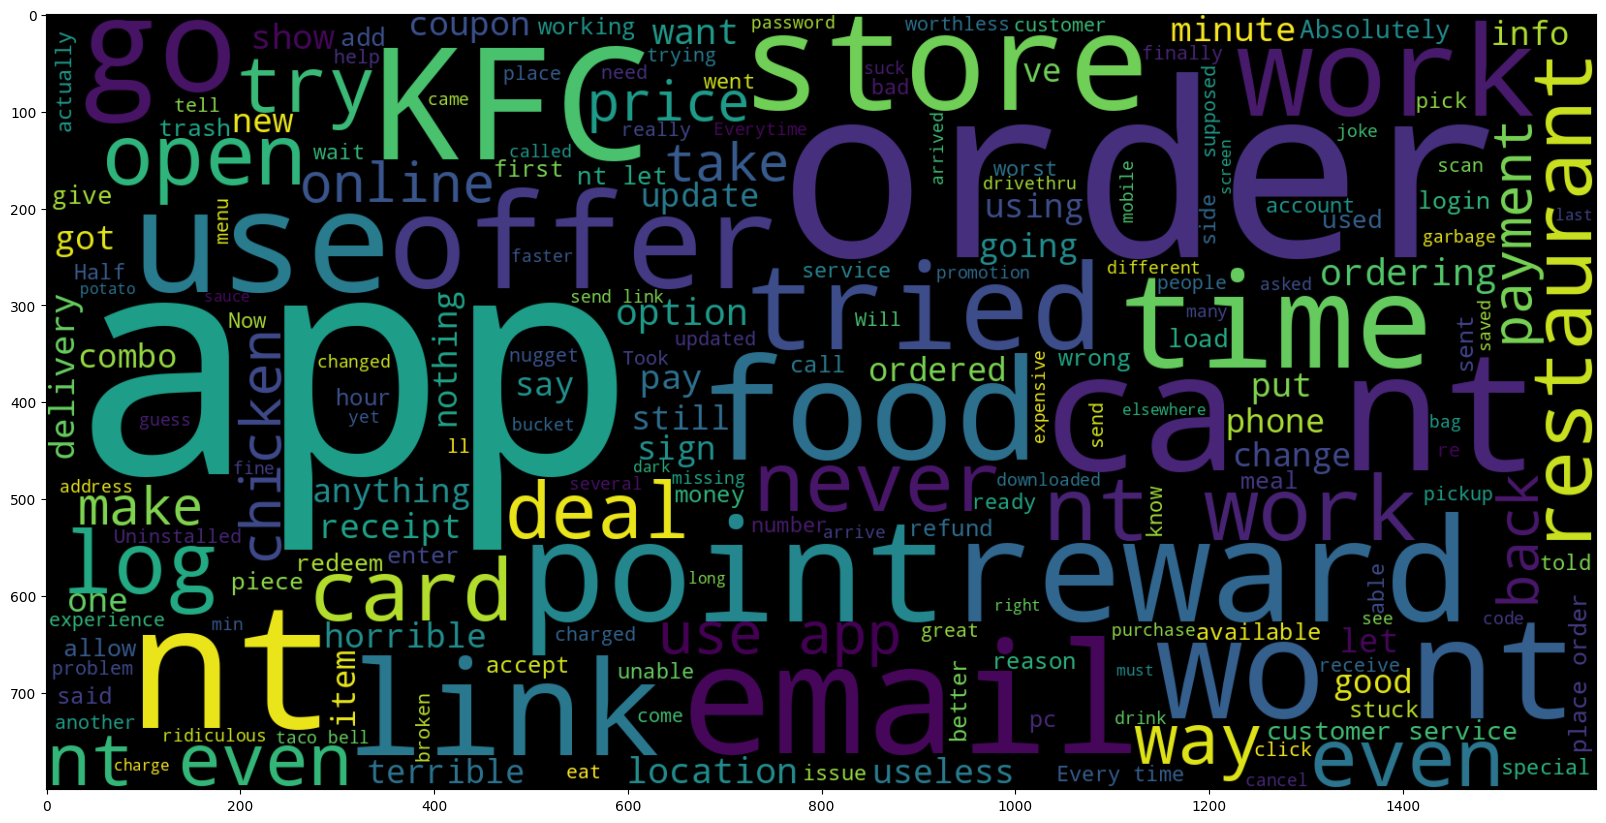

In [ ]:
plt.figure(figsize = (20,20)) # Reviews with Negative Ratings

negative_reviews = wc.WordCloud( min_font_size = 3 , width = 1600 , height = 800).generate(" ".join(bad))

plt.imshow(negative_reviews,interpolation = 'bilinear')

In [ ]:
from nltk import ngrams

n_grams_good = pd.Series(ngrams(" ".join(good).split(), 3)).value_counts()[:20]
n_grams_bad = pd.Series(ngrams(" ".join(bad).split(), 3)).value_counts()[:20]

Text(0.5, 0, 'No. of Occurances')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


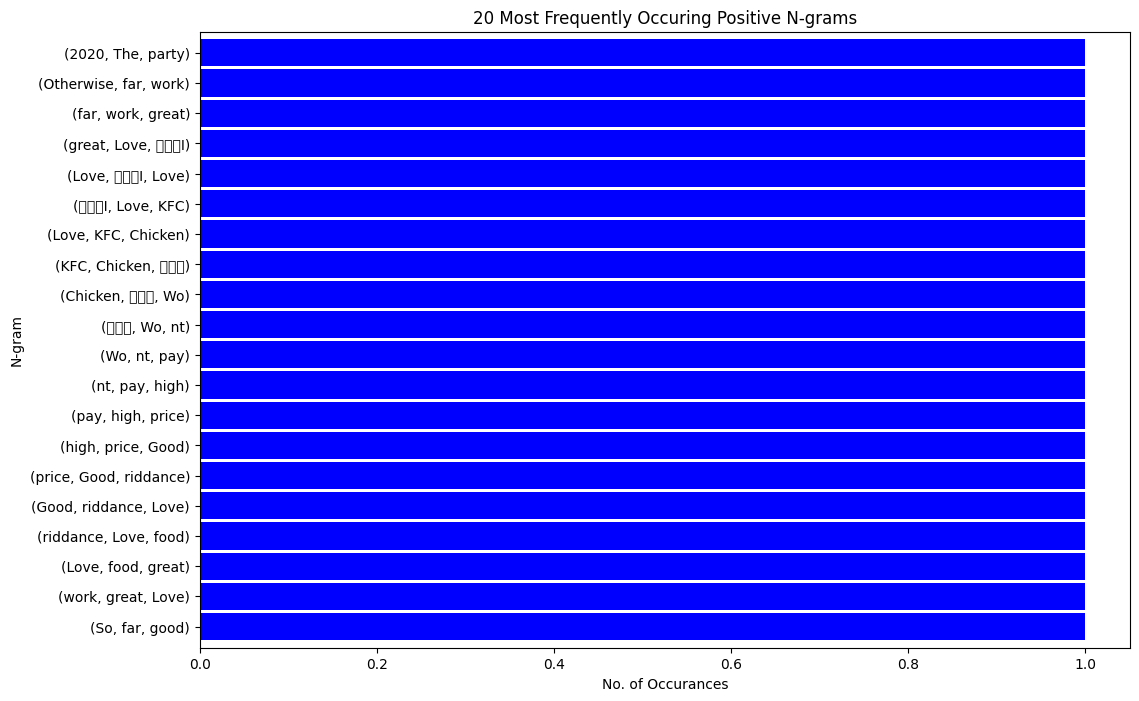

In [ ]:
n_grams_good.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Positive N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

Text(0.5, 0, 'No. of Occurances')

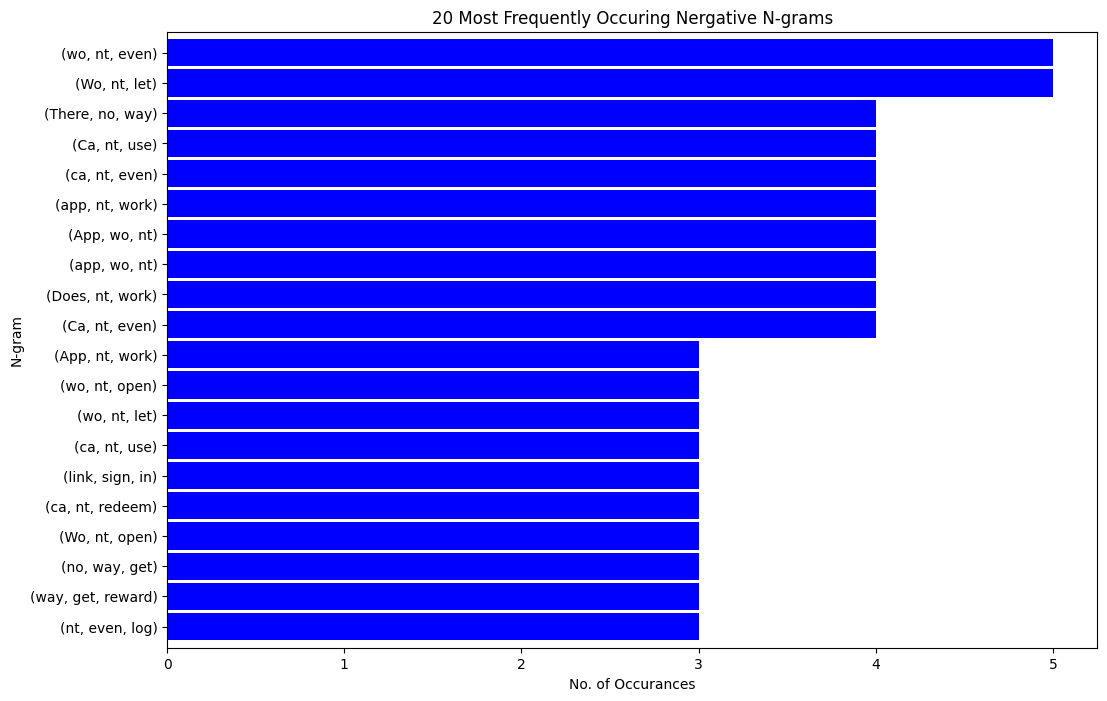

In [ ]:
n_grams_bad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Nergative N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

In [ ]:
import collections

# Step 1: Calculate the frequency of each word in the entire dataset
word_frequency = collections.Counter([word for review in df_US1['content'] for word in review.split()])

# Step 2: Sort the words based on their frequency
sorted_words = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

# Step 3: Manually identify keywords related to each aspect
food_quality_keywords = {'delicious', 'tasty', 'flavorful', 'yummy', 'satisfying', 'bland', 'tasteless', 'horrible', 'amazing', 'great', 'fresh', 'quality', 'good', 'bad', 'good food', 'good quality', 'bad food', 'bad quality', 'oily', 'food'}
service_keywords = {'fast', 'friendly', 'efficient', 'courteous', 'attentive', 'rude', 'slow', 'excellent', 'helpful', 'quick', 'professional', 'crash'}
ambiance_keywords = {'cozy', 'atmospheric', 'inviting', 'relaxing', 'welcoming', 'comfortable', 'clean', 'modern', 'pleasant', 'quiet', 'spacious'}
price_keywords = {'affordable', 'reasonable', 'value', 'budget-friendly', 'inexpensive', 'expensive', 'cheap', 'pricey', 'cost', 'economical', 'bad price', 'good price', 'good value', 'bad value'}

# Step 4: Define the minimum frequency threshold for each aspect
min_frequency = 1  # Adjust as needed

# Step 5: Filter the most frequent words to obtain keywords related to each aspect
food_quality_keywords_freq = [(word, freq) for word, freq in sorted_words if word in food_quality_keywords and freq >= min_frequency]
service_keywords_freq = [(word, freq) for word, freq in sorted_words if word in service_keywords and freq >= min_frequency]
ambiance_keywords_freq = [(word, freq) for word, freq in sorted_words if word in ambiance_keywords and freq >= min_frequency]
price_keywords_freq = [(word, freq) for word, freq in sorted_words if word in price_keywords and freq >= min_frequency]

# Print the keywords for each aspect
print("Food Quality Keywords:")
print(food_quality_keywords_freq)
print("\nService Keywords:")
print(service_keywords_freq)
print("\nAmbiance Keywords:")
print(ambiance_keywords_freq)
print("\nPrice Keywords:")
print(price_keywords_freq)

Food Quality Keywords:
[('food', 66), ('good', 36), ('great', 15), ('bad', 10), ('horrible', 7), ('tasty', 2), ('fresh', 2), ('quality', 1)]

Service Keywords:
[('fast', 9), ('crash', 6), ('rude', 4), ('friendly', 3), ('quick', 3), ('slow', 2), ('efficient', 1), ('helpful', 1), ('excellent', 1)]

Ambiance Keywords:
[]

Price Keywords:
[('expensive', 6), ('value', 2), ('cheap', 1), ('cost', 1)]


         Aspect  Positive Sentiment (%)  Negative Sentiment (%)
0  Food Quality                0.875000                0.125000
1       Service                0.750000                0.250000
2      Ambiance                0.000000                0.000000
3         Price                0.333333                0.666667


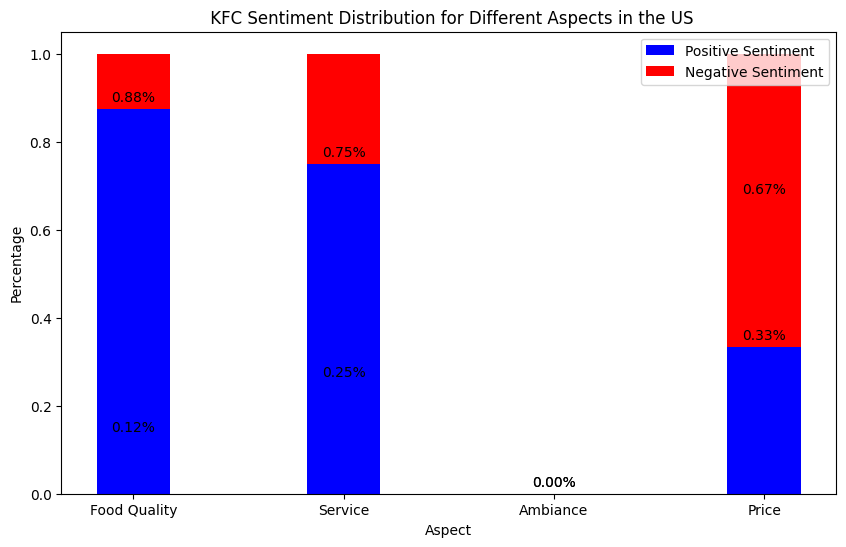

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Positive and negative sentiment words
positive_words = {'food','good', 'excellent', 'delicious', 'friendly', 'efficient', 'great', 'helpful', 'quick', 'fast', 'value', 'cheap', 'tasty'}
negative_words = {'bad', 'horrible', 'tasteless', 'rude', 'slow', 'terrible', 'expensive'}

# Function to calculate sentiment distribution for each aspect
def calculate_sentiment_distribution(keywords_freq, aspect):
    positive_sentiment = sum([freq for word, freq in keywords_freq if word in positive_words])
    negative_sentiment = sum([freq for word, freq in keywords_freq if word in negative_words])
    total = positive_sentiment + negative_sentiment

    if total == 0:
        return 0, 0

    positive_percentage = positive_sentiment / total
    negative_percentage = negative_sentiment / total
    return positive_percentage, negative_percentage

# Calculate sentiment distribution for each aspect
food_quality_positive, food_quality_negative = calculate_sentiment_distribution(food_quality_keywords_freq, 'Food Quality')
service_positive, service_negative = calculate_sentiment_distribution(service_keywords_freq, 'Service')
ambiance_positive, ambiance_negative = calculate_sentiment_distribution(ambiance_keywords_freq, 'Ambiance')
price_positive, price_negative = calculate_sentiment_distribution(price_keywords_freq, 'Price')

# Create a DataFrame to store the results
sentiment_df = pd.DataFrame({
    'Aspect': ['Food Quality', 'Service', 'Ambiance', 'Price'],
    'Positive Sentiment (%)': [food_quality_positive, service_positive, ambiance_positive, price_positive],
    'Negative Sentiment (%)': [food_quality_negative, service_negative, ambiance_negative, price_negative]
})

# Display the DataFrame
print(sentiment_df)

# Plot sentiment distribution for all aspects as a histogram
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(sentiment_df))

positive_bars = ax.bar(index, sentiment_df['Positive Sentiment (%)'], bar_width, color='blue', label='Positive Sentiment')
negative_bars = ax.bar(index, sentiment_df['Negative Sentiment (%)'], bar_width, color='red', label='Negative Sentiment', bottom=sentiment_df['Positive Sentiment (%)'])

ax.set_xlabel('Aspect')
ax.set_ylabel('Percentage')
ax.set_title(' KFC Sentiment Distribution for Different Aspects in the US')
ax.set_xticks(index)
ax.set_xticklabels(sentiment_df['Aspect'])
ax.legend()

# Add percentage values on top of the bars
for bars in [positive_bars, negative_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()


In [ ]:
# Calculate the total count of keywords
total_keywords_count = len(food_quality_keywords_freq) + len(service_keywords_freq) + len(ambiance_keywords_freq) + len(price_keywords_freq)

# Calculate the percentage of keywords for each aspect
food_quality_percentage = (len(food_quality_keywords_freq) / total_keywords_count) * 100
service_percentage = (len(service_keywords_freq) / total_keywords_count) * 100
ambiance_percentage = (len(ambiance_keywords_freq) / total_keywords_count) * 100
price_percentage = (len(price_keywords_freq) / total_keywords_count) * 100

# Print the percentage of keywords for each aspect
print("Food Quality Percentage:", food_quality_percentage, "%")
print("Service Percentage:", service_percentage, "%")
print("Ambiance Percentage:", ambiance_percentage, "%")
print("Price Percentage:", price_percentage, "%")


Food Quality Percentage: 38.095238095238095 %
Service Percentage: 42.857142857142854 %
Ambiance Percentage: 0.0 %
Price Percentage: 19.047619047619047 %


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenate all reviews into a single string
corpus = ' '.join(df_egy1['content'])

# Define the aspects and their related keywords
aspects_keywords = {
    'food_quality': ['delicious', 'tasty', 'flavorful', 'yummy', 'satisfying', 'bland', 'tasteless', 'horrible', 'amazing', 'great', 'fresh', 'quality', 'good', 'bad', 'good food', 'good quality', 'bad food', 'bad quality', 'oily', 'food'],
    'service': ['fast', 'friendly', 'efficient', 'courteous', 'attentive', 'rude', 'slow', 'excellent', 'helpful', 'quick', 'professional', 'crash'],
    'ambiance': ['cozy', 'atmospheric', 'inviting', 'relaxing', 'welcoming', 'comfortable', 'clean', 'modern', 'pleasant', 'quiet', 'spacious'],
    'price': ['affordable', 'reasonable', 'value', 'budget-friendly', 'inexpensive', 'expensive', 'cheap', 'pricey', 'cost', 'economical', 'bad price', 'good price', 'good value', 'bad value']
}

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform([corpus])

# Extract TF-IDF scores for each word
tfidf_scores = tfidf_matrix.toarray()[0]

# Get feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary to store TF-IDF scores for each word
word_tfidf_scores = {word: score for word, score in zip(feature_names, tfidf_scores)}

# Extract keywords for each aspect based on TF-IDF scores
aspect_keywords_tfidf = {}
for aspect, keywords in aspects_keywords.items():
    aspect_keywords_tfidf[aspect] = [(word, word_tfidf_scores.get(word, 0)) for word in keywords]

# Print the keywords for each aspect
print("Food Quality Keywords (TF-IDF):")
print(aspect_keywords_tfidf['food_quality'])
print("\nService Keywords (TF-IDF):")
print(aspect_keywords_tfidf['service'])
print("\nAmbiance Keywords (TF-IDF):")
print(aspect_keywords_tfidf['ambiance'])
print("\nPrice Keywords (TF-IDF):")
print(aspect_keywords_tfidf['price'])



Food Quality Keywords (TF-IDF):
[('delicious', 0.0015926292944912525), ('tasty', 0.003185258588982505), ('flavorful', 0), ('yummy', 0.0015926292944912525), ('satisfying', 0), ('bland', 0), ('tasteless', 0), ('horrible', 0.023889439417368787), ('amazing', 0), ('great', 0.04459362024575507), ('fresh', 0.00637051717796501), ('quality', 0.003185258588982505), ('good', 0.09237249908049265), ('bad', 0.015926292944912525), ('good food', 0), ('good quality', 0), ('bad food', 0), ('bad quality', 0), ('oily', 0), ('food', 0.11626193849786143)]

Service Keywords (TF-IDF):
[('fast', 0.01911155153389503), ('friendly', 0.0047778878834737575), ('efficient', 0.0015926292944912525), ('courteous', 0), ('attentive', 0), ('rude', 0.00637051717796501), ('slow', 0.003185258588982505), ('excellent', 0.007963146472456262), ('helpful', 0.0015926292944912525), ('quick', 0.0047778878834737575), ('professional', 0), ('crash', 0.009555775766947515)]

Ambiance Keywords (TF-IDF):
[('cozy', 0), ('atmospheric', 0), ('

In [ ]:
# Calculate the total count of keywords
total_tfidf_count = sum(len(aspect_keywords_tfidf[aspect]) for aspect in aspects_keywords)

# Calculate the percentage of keywords for each aspect
food_quality_tfidf_percentage = (len(aspect_keywords_tfidf['food_quality']) / total_tfidf_count) * 100
service_tfidf_percentage = (len(aspect_keywords_tfidf['service']) / total_tfidf_count) * 100
ambiance_tfidf_percentage = (len(aspect_keywords_tfidf['ambiance']) / total_tfidf_count) * 100
price_tfidf_percentage = (len(aspect_keywords_tfidf['price']) / total_tfidf_count) * 100

# Check if there are no keywords extracted for an aspect
if len(aspect_keywords_tfidf['food_quality']) == 0:
    food_quality_tfidf_percentage = 0

if len(aspect_keywords_tfidf['service']) == 0:
    service_tfidf_percentage = 0

if len(aspect_keywords_tfidf['ambiance']) == 0:
    ambiance_tfidf_percentage = 0

if len(aspect_keywords_tfidf['price']) == 0:
    price_tfidf_percentage = 0

# Print the percentage of keywords for each aspect
print("Food Quality Percentage (TF-IDF):", food_quality_tfidf_percentage, "%")
print("Service Percentage (TF-IDF):", service_tfidf_percentage, "%")
print("Ambiance Percentage (TF-IDF):", ambiance_tfidf_percentage, "%")
print("Price Percentage (TF-IDF):", price_tfidf_percentage, "%")


Food Quality Percentage (TF-IDF): 35.08771929824561 %
Service Percentage (TF-IDF): 21.052631578947366 %
Ambiance Percentage (TF-IDF): 19.298245614035086 %
Price Percentage (TF-IDF): 24.561403508771928 %


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare your data
X = df_US1['content']  # Independent variable
y = df_US1['Sentiment']  # Dependent variable

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Step 4: Train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8690476190476191

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       122
           1       1.00      0.52      0.69        46

    accuracy                           0.87       168
   macro avg       0.92      0.76      0.80       168
weighted avg       0.89      0.87      0.85       168



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(random_state=42)

random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
ph_projectUS = reviews_all('com.yum.pizzahut', sleep_milliseconds= 0, lang = 'en', country = 'US', sort = Sort.NEWEST)

In [ ]:
df_US2 = pd.json_normalize(ph_projectUS)

In [ ]:
df_US2.head(1000)

reviewId            userName  \
0    b3e33254-7718-4d11-b734-b21f6d8c2b72         Laura Crump   
1    a59e1d39-3977-4ad7-9e7c-2d1c4ecfc1f6         Karen Adams   
2    8950d088-4cf7-47af-95a6-20f0009adbd9     Melissa Simmons   
3    5f88dab4-d8d9-46c9-8bea-4948e4c757b6       Lola Castillo   
4    9ca0b4da-c9a6-4009-a36c-95c670513630         Tamara Kane   
..                                    ...                 ...   
393  cab9e096-4a22-48a0-b9aa-a8cc06e8b8db       Brandi Sluder   
394  985fef23-1de7-49d3-8d73-bcfce505a963  David keith Steege   
395  af666ad5-e265-4e15-a2c3-22601e8d11f8  Layla Rose Johnson   
396  2cad274d-0b28-4704-93df-dcede35b93aa           Bob Veach   
397  d5047bf8-b994-4df6-a481-b3aefe0f8db1      Jedidiah Bryan   

                                             userImage  \
0    https://play-lh.googleusercontent.com/a-/ALV-U...   
1    https://play-lh.googleusercontent.com/a/ACg8oc...   
2    https://play-lh.googleusercontent.com/a-/ALV-U...   
3    https://play-lh.googleusercontent.com/a/ACg8oc...   
4    https://play-lh.googleusercontent.com/a-/ALV-U...   
..                                                 ...   
393  https://play-lh.googleusercontent.com/a/ACg8oc...   
394  https://play-lh.googleusercontent.com/a-/ALV-U...   
395  https://play-lh.googleusercontent.com/a-/ALV-U...   
396  https://play-lh.googleusercontent.com/a/ACg8oc...   
397  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                               content  score  thumbsUpCount  \
0    I'm slowly learning to use this app. it's gett...      5              0   
1                                Ordering is so simply      5              0   
2                                 Best pizza in town !      5              0   
3        good job. very professional and love the app.      5              0   
4                         I can't get in to see deals!      1              0   
..                                                 ...    ...            ...   
393                                      Amazing staff      5              0   
394                                        Works well.      5              0   
395  I love your app, but it has been crashing alot...      4              0   
396  Improved service improve food always getting b...      4              0   
397   Not bad just hard to get reward points sometimes      3              0   

    reviewCreatedVersion                  at replyContent repliedAt appVersion  
0                 5.33.1 2024-05-02 15:39:58         None      None     5.33.1  
1                 5.33.1 2024-05-02 15:28:44         None      None     5.33.1  
2                 5.33.1 2024-05-02 15:04:22         None      None     5.33.1  
3                 5.33.1 2024-05-02 13:12:45         None      None     5.33.1  
4                 5.33.1 2024-05-02 12:16:11         None      None     5.33.1  
..                   ...                 ...          ...       ...        ...  
393               5.33.1 2024-04-30 14:46:02         None      None     5.33.1  
394               5.33.1 2024-04-30 14:45:06         None      None     5.33.1  
395               5.33.1 2024-04-30 14:41:10         None      None     5.33.1  
396               5.33.1 2024-04-30 14:00:16         None      None     5.33.1  
397               5.33.1 2024-04-30 05:07:57         None      None     5.33.1  

[398 rows x 11 columns]

In [ ]:
df_US2.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt                       object
appVersion                      object
dtype: object

In [ ]:
df_US2['score'].mean()

3.8241206030150754

<ipython-input-22-b80da300eebf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'score', data = df_US2, palette = 'deep')


<Axes: xlabel='score', ylabel='count'>

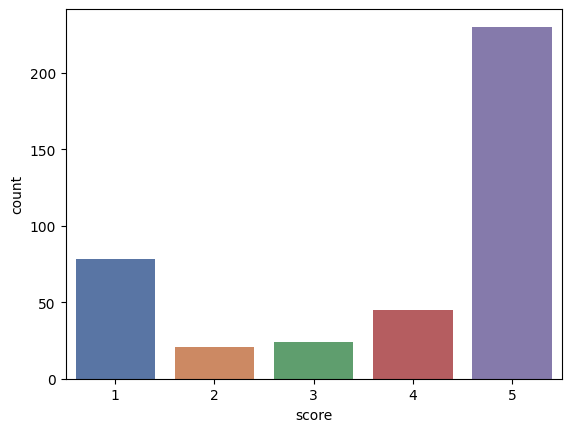

In [ ]:
sns.countplot(x = 'score', data = df_US2, palette = 'deep')

In [ ]:
df_US2['Sentiment'] = df_US2['score'].apply(lambda rating : 'neutral' if rating == 3 else 'positive' if rating > 3 else 'negative')

<Axes: xlabel='Sentiment', ylabel='count'>

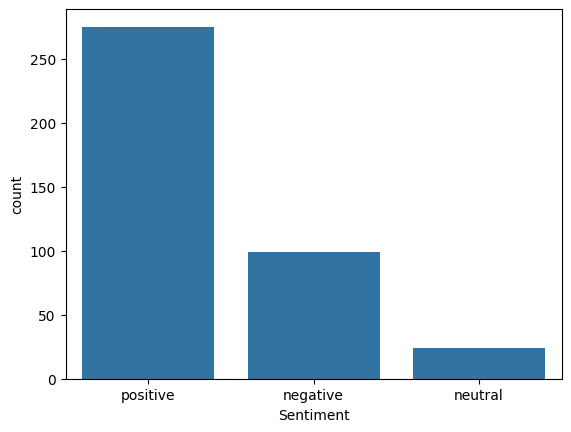

In [ ]:
sns.countplot(x = 'Sentiment', data = df_US2)

In [ ]:
neutral_reviews_index = df_US2[df_US2['Sentiment']=='neutral'].index

df_US2 = df_US2.drop(neutral_reviews_index)

df_US2['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
df_US3 = df_US2[['content', 'Sentiment']].copy()
df_US3

content Sentiment
0    I'm slowly learning to use this app. it's gett...  positive
1                                Ordering is so simply  positive
2                                 Best pizza in town !  positive
3        good job. very professional and love the app.  positive
4                         I can't get in to see deals!  negative
..                                                 ...       ...
392                             Great customer service  positive
393                                      Amazing staff  positive
394                                        Works well.  positive
395  I love your app, but it has been crashing alot...  positive
396  Improved service improve food always getting b...  positive

[374 rows x 2 columns]

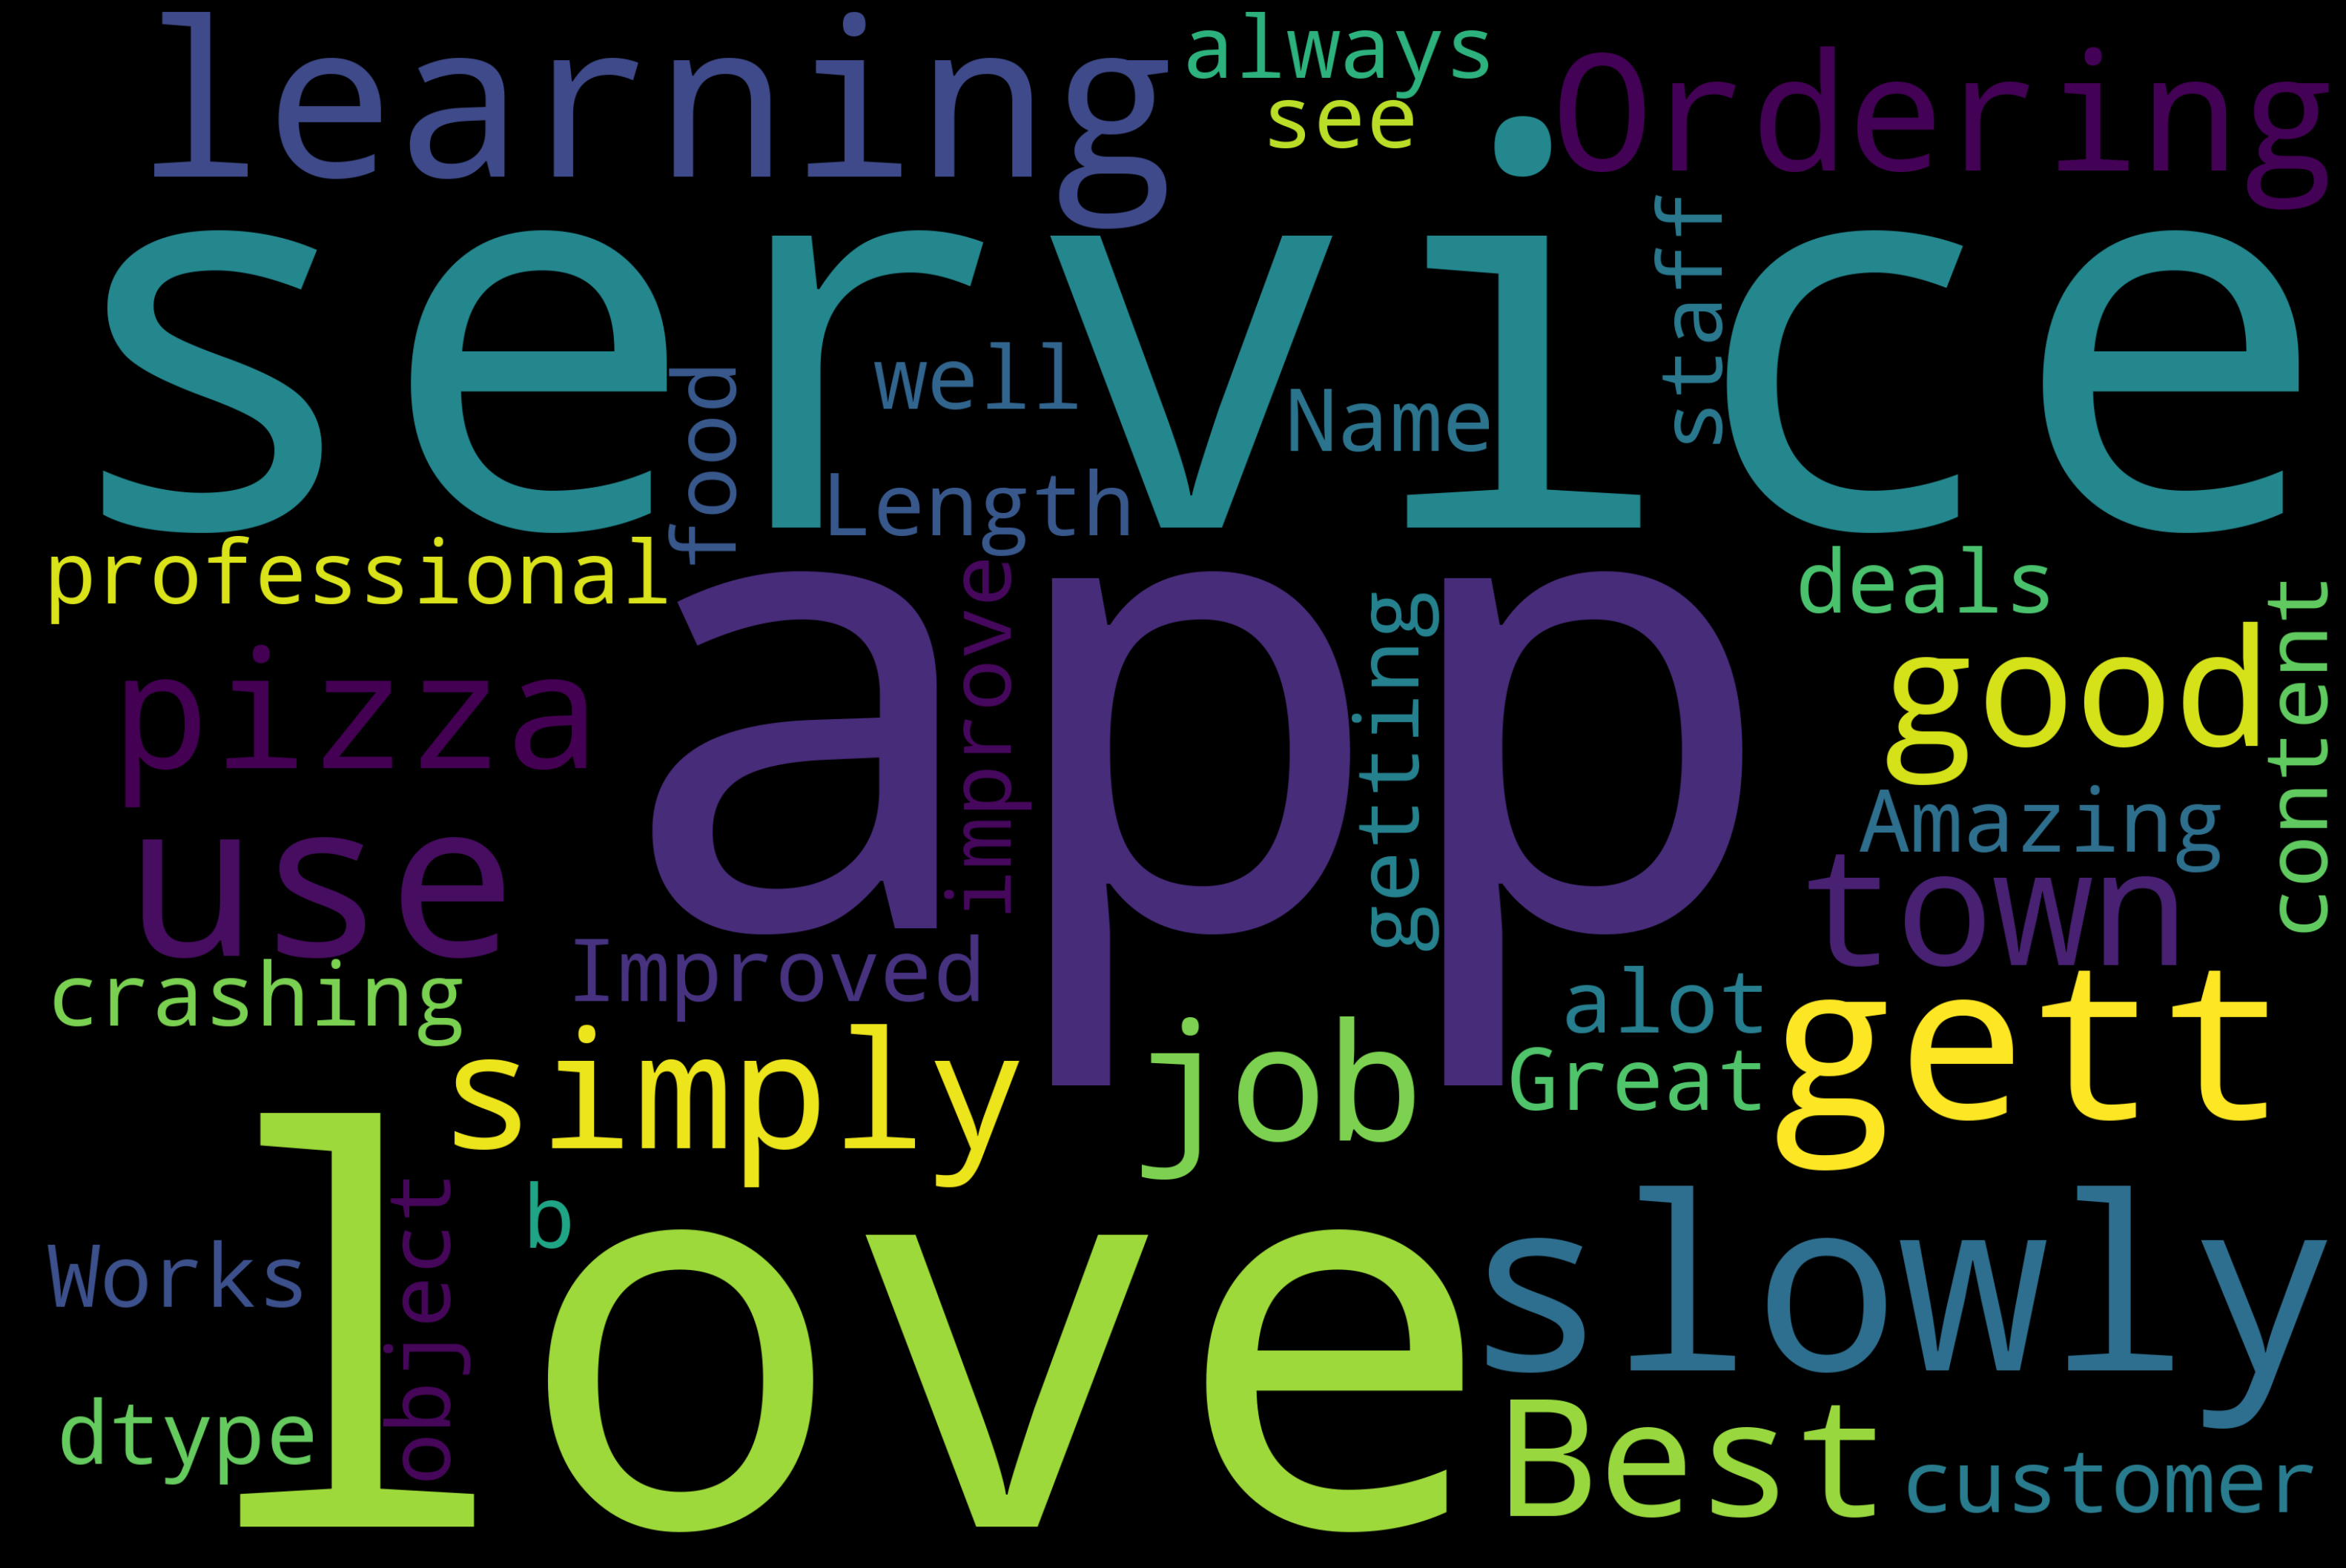

In [ ]:
#!pip install wordcloud
# import wordcloud as wc

text = df_US3["content"]

wordcloud = wc.WordCloud(
    width = 3000,
    height = 2000,
    stopwords = wc.STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [ ]:
from bs4 import BeautifulSoup
!pip install lxml
df_US3['content'] = df_US3['content'].apply(lambda review : BeautifulSoup(review, "lxml").text)

df_US3['content']

<ipython-input-28-10fb38a23973>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_US3['content'] = df_US3['content'].apply(lambda review : BeautifulSoup(review, "lxml").text)


0      I'm slowly learning to use this app. it's gett...
1                                  Ordering is so simply
2                                   Best pizza in town !
3          good job. very professional and love the app.
4                           I can't get in to see deals!
                             ...                        
392                               Great customer service
393                                        Amazing staff
394                                          Works well.
395    I love your app, but it has been crashing alot...
396    Improved service improve food always getting b...
Name: content, Length: 374, dtype: object

In [ ]:
!pip install nltk
import nltk
from nltk import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df_US3['content'] = df_US3['content'].apply(lambda review: tokenizer.tokenize(review))
df_US3['content']

0      [I, 'm, slowly, learning, to, use, this, app.,...
1                             [Ordering, is, so, simply]
2                             [Best, pizza, in, town, !]
3      [good, job., very, professional, and, love, th...
4               [I, ca, n't, get, in, to, see, deals, !]
                             ...                        
392                           [Great, customer, service]
393                                     [Amazing, staff]
394                                     [Works, well, .]
395    [I, love, your, app, ,, but, it, has, been, cr...
396    [Improved, service, improve, food, always, get...
Name: content, Length: 374, dtype: object

In [ ]:
#ALl English stopwords

!pip install --upgrade nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
np.unique(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him',
       'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn',
       "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma',
       'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't",
       'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o',
       'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours',
       'ourselves', 'out', 'over', 'own', 're', 's', 'same

In [ ]:
negation_list = ["no","nor", "not", "n't"]

stop_words = [word for word in stop_words if word not in negation_list]
np.unique(stop_words)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him',
       'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn',
       "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma',
       'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't",
       'my', 'myself', 'needn', "needn't", 'now', 'o', 'of', 'off', 'on',
       'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out',
       'over', 'own', 're', 's', 'same', 'shan', "shan't",

In [ ]:
# Remove stopwords from each review
df_US3['content'] = df_US3['content'].apply(lambda review: [word for word in review if word not in stop_words])

# Flatten the list of words in each review
all_words = [word for review in df_US3['content'] for word in review]

# Get unique words
unique_words = np.unique(all_words)

print(unique_words)

['!' '$' '%' ... '🤷' '🥰' '🥴']


In [ ]:
# removing puncuations, and removing any dots, dashes, or empty strings

import string

df_US3['content'] = df_US3['content'].apply(lambda review : list(filter(None,[word for word in review if word not in string.punctuation])))

np.unique(df_US3['content'])

array([list(['12', 'pizza', 'deal']),
       list(['5', 'delivery', 'fee', "n't", 'go', 'driver', 'rip', 'off.', 'You', "'re", 'stealing', 'money', 'employees', 'greedy', 'corporation']),
       list(['95', 'time', 'works', 'great.', 'Has', 'current', 'deals', 'local', 'location', 'I', "'m", 'able', 'order', 'I', 'want', 'ready', 'I', 'want']),
       list(['A', '5', 'delivery', 'fee', 'ridiculous']),
       list(['ALWAYS', 'A', 'PLEASURE']), list(['AWESOME']),
       list(['Absolutely', 'Love', 'staff', 'Great', 'service', 'great', 'staff', 'Only', 'pizza', 'hut', 'I', 'go', 'also', 'best', 'pizza', 'hut', 'Gaston', 'county', 'opinion', '❤️🧡💛💚💙💜']),
       list(['Actually', 'enjoy', 'pizza', 'again.', 'Keep', 'good', 'work']),
       list(['Add', 'points']), list(['Always', 'Great']),
       list(['Always', 'amazing']),
       list(['Always', 'come', 'back', 'you.', 'Great', 'service', 'delivery.', 'Only', 'drawback', 'delivery', 'people', 'need', 'change', 'least', '20']),
       lis

In [ ]:
#Replace multiple characters with a single space in each string
df_US3['content'] = df_US3['content'].apply(lambda review: list(filter(None,[re.sub(r"[-._'`*]+", '', word) for word in review])))

# Removing single Characters
df_US3['content'] = df_US3['content'].apply(lambda review : list(filter(None,[word for word in review if len(word)>1])))


# Print the result
np.unique(df_US3['content'])

array([list([]), list(['12', 'pizza', 'deal']),
       list(['95', 'time', 'works', 'great', 'Has', 'current', 'deals', 'local', 'location', 'able', 'order', 'want', 'ready', 'want']),
       list(['ALWAYS', 'PLEASURE']), list(['AWESOME']),
       list(['Absolutely', 'Love', 'staff', 'Great', 'service', 'great', 'staff', 'Only', 'pizza', 'hut', 'go', 'also', 'best', 'pizza', 'hut', 'Gaston', 'county', 'opinion', '❤️🧡💛💚💙💜']),
       list(['Actually', 'enjoy', 'pizza', 'again', 'Keep', 'good', 'work']),
       list(['Add', 'points']), list(['Always', 'Great']),
       list(['Always', 'amazing']),
       list(['Always', 'come', 'back', 'you', 'Great', 'service', 'delivery', 'Only', 'drawback', 'delivery', 'people', 'need', 'change', 'least', '20']),
       list(['Always', 'delicious']), list(['Always', 'delightful']),
       list(['Always', 'excellent', 'experience']),
       list(['Always', 'fast', 'good']),
       list(['Always', 'get', 'order', 'correctly', 'Drivers', 'nice', 'friendly

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df_US3['content'] = df_US3['content'].apply(lambda review: [lemmatizer.lemmatize(word) for word in review])
np.unique(df_US3['content'])

[nltk_data] Downloading package wordnet to /root/nltk_data...


array([list([]), list(['12', 'pizza', 'deal']),
       list(['95', 'time', 'work', 'great', 'Has', 'current', 'deal', 'local', 'location', 'able', 'order', 'want', 'ready', 'want']),
       list(['ALWAYS', 'PLEASURE']), list(['AWESOME']),
       list(['Absolutely', 'Love', 'staff', 'Great', 'service', 'great', 'staff', 'Only', 'pizza', 'hut', 'go', 'also', 'best', 'pizza', 'hut', 'Gaston', 'county', 'opinion', '❤️🧡💛💚💙💜']),
       list(['Actually', 'enjoy', 'pizza', 'again', 'Keep', 'good', 'work']),
       list(['Add', 'point']), list(['Always', 'Great']),
       list(['Always', 'amazing']),
       list(['Always', 'come', 'back', 'you', 'Great', 'service', 'delivery', 'Only', 'drawback', 'delivery', 'people', 'need', 'change', 'least', '20']),
       list(['Always', 'delicious']), list(['Always', 'delightful']),
       list(['Always', 'excellent', 'experience']),
       list(['Always', 'fast', 'good']),
       list(['Always', 'get', 'order', 'correctly', 'Drivers', 'nice', 'friendly'])

In [ ]:
# each review will be represented as one string

df_US3['content']= df_US3['content'].apply(lambda x : " ".join(x))

In [ ]:
df_US3['content']

0      slowly learning use app getting easier order p...
1                                        Ordering simply
2                                        Best pizza town
3                         good job professional love app
4                                     ca nt get see deal
                             ...                        
392                               Great customer service
393                                        Amazing staff
394                                           Works well
395    love app crashing alot It wo nt let use point ...
396    Improved service improve food always getting b...
Name: content, Length: 374, dtype: object

In [ ]:
df_US3['Sentiment'] = df_US3['Sentiment'].astype('category').cat.codes

df_US3['Sentiment']

0      1
1      1
2      1
3      1
4      0
      ..
392    1
393    1
394    1
395    1
396    1
Name: Sentiment, Length: 374, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split

X = df_US3['content'] #Independent Variable
y = df_US3['Sentiment'] #Dependent Variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

good = x_train[y_train[y_train == 1].index]
bad = x_train[y_train[y_train == 0].index]

In [ ]:
from nltk import ngrams

n_grams_good2 = pd.Series(ngrams(" ".join(good).split(), 3)).value_counts()[:20]
n_grams_bad2 = pd.Series(ngrams(" ".join(bad).split(), 3)).value_counts()[:20]

Text(0.5, 0, 'No. of Occurances')

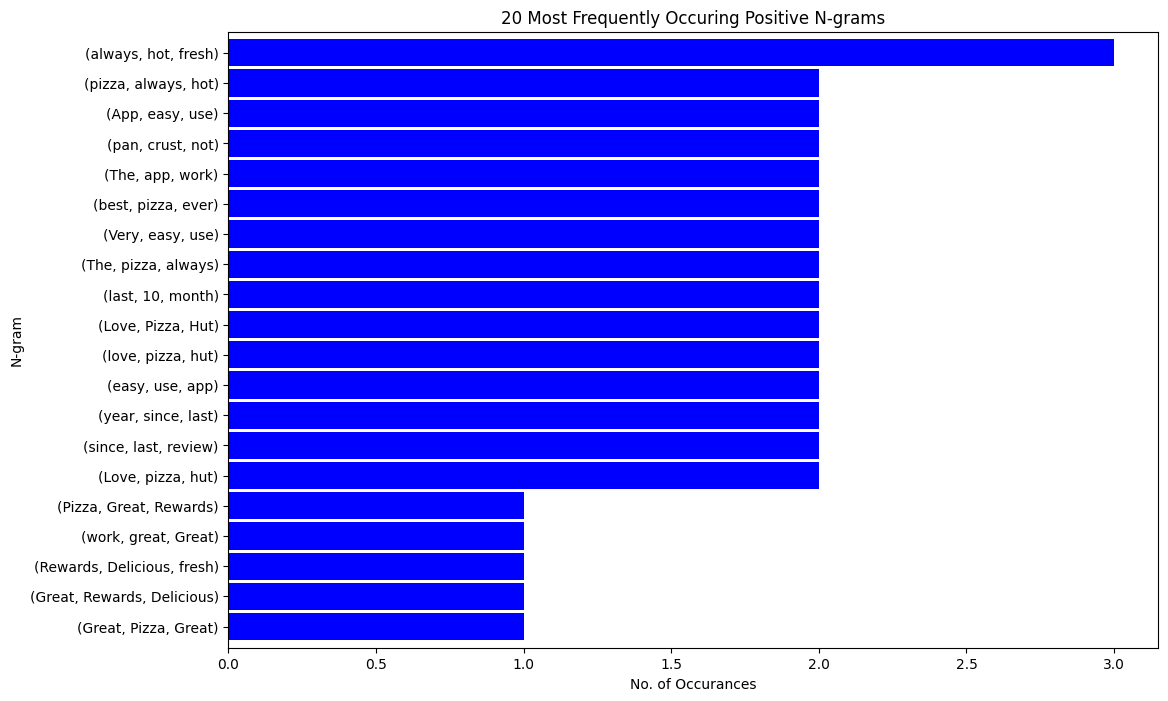

In [ ]:
n_grams_good2.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Positive N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

Text(0.5, 0, 'No. of Occurances')

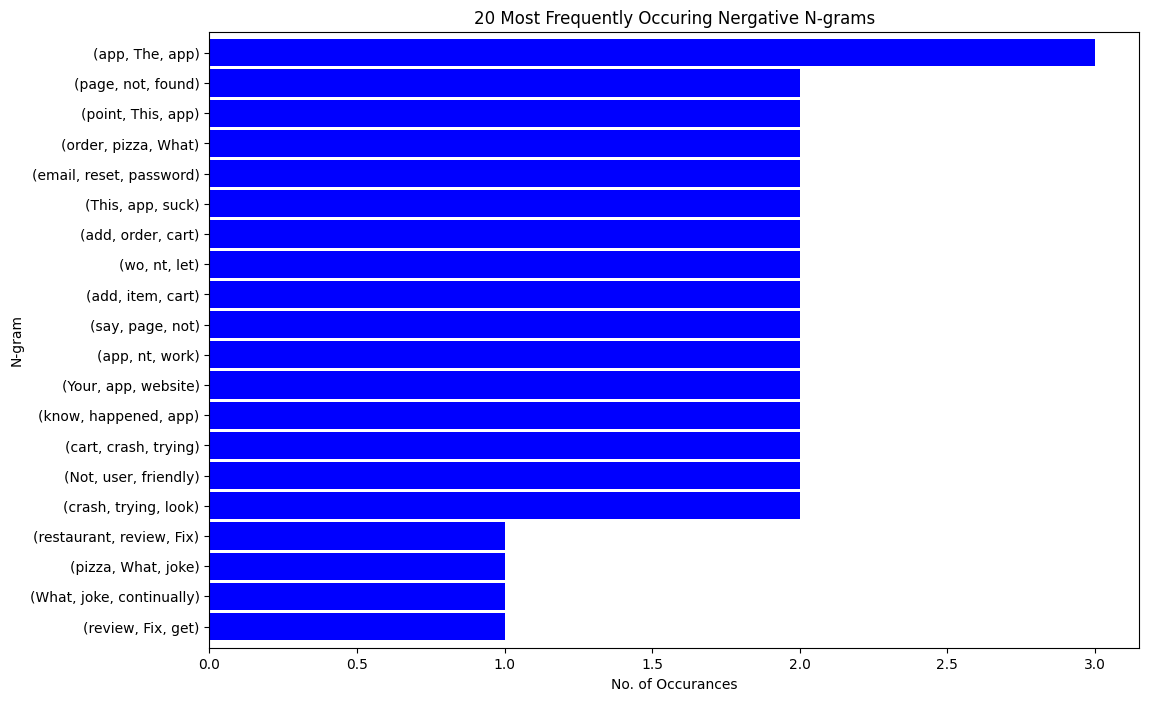

In [ ]:
n_grams_bad2.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Nergative N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

In [ ]:
import collections

# Step 1: Calculate the frequency of each word in the entire dataset
word_frequency = collections.Counter([word for review in df_US3['content'] for word in review.split()])

# Step 2: Sort the words based on their frequency
sorted_words = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

# Step 3: Manually identify keywords related to each aspect
food_quality_keywords = {'food','delicious', 'tasty', 'flavorful', 'yummy', 'satisfying', 'bland', 'tasteless', 'horrible', 'amazing', 'great', 'fresh', 'quality', 'good', 'bad', 'good food', 'good quality', 'bad food', 'bad quality'}
service_keywords = {'fast', 'friendly', 'efficient', 'courteous', 'attentive', 'rude', 'slow', 'excellent', 'helpful', 'quick', 'professional', 'crash'}
ambiance_keywords = {'cozy', 'atmospheric', 'inviting', 'relaxing', 'welcoming', 'comfortable', 'clean', 'modern', 'pleasant', 'quiet', 'spacious'}
price_keywords = {'affordable', 'reasonable', 'value', 'budget-friendly', 'inexpensive', 'expensive', 'cheap', 'pricey', 'cost', 'economical', 'bad price', 'good price', 'good value', 'bad value'}

# Step 4: Define the minimum frequency threshold for each aspect
min_frequency = 0  # Adjust as needed

# Step 5: Filter the most frequent words to obtain keywords related to each aspect
food_quality_keywords_freq = [(word, freq) for word, freq in sorted_words if word in food_quality_keywords and freq >= min_frequency]
service_keywords_freq = [(word, freq) for word, freq in sorted_words if word in service_keywords and freq >= min_frequency]
ambiance_keywords_freq = [(word, freq) for word, freq in sorted_words if word in ambiance_keywords and freq >= min_frequency]
price_keywords_freq = [(word, freq) for word, freq in sorted_words if word in price_keywords and freq >= min_frequency]

# Print the keywords for each aspect
print("Food Quality Keywords:")
print(food_quality_keywords_freq)
print("\nService Keywords:")
print(service_keywords_freq)
print("\nAmbiance Keywords:")
print(ambiance_keywords_freq)
print("\nPrice Keywords:")
print(price_keywords_freq)

Food Quality Keywords:
[('good', 38), ('great', 32), ('food', 29), ('fresh', 11), ('horrible', 6), ('delicious', 5), ('quality', 3), ('amazing', 3), ('bad', 2), ('tasty', 1)]

Service Keywords:
[('crash', 12), ('slow', 10), ('friendly', 10), ('fast', 7), ('quick', 5), ('excellent', 4), ('efficient', 3), ('rude', 3), ('professional', 1), ('courteous', 1), ('helpful', 1)]

Ambiance Keywords:
[]

Price Keywords:
[('value', 2), ('reasonable', 1)]


         Aspect  Positive Sentiment  Negative Sentiment
0  Food Quality            0.906977            0.093023
1       Service            0.704545            0.295455
2      Ambiance            0.000000            0.000000
3         Price            1.000000            0.000000


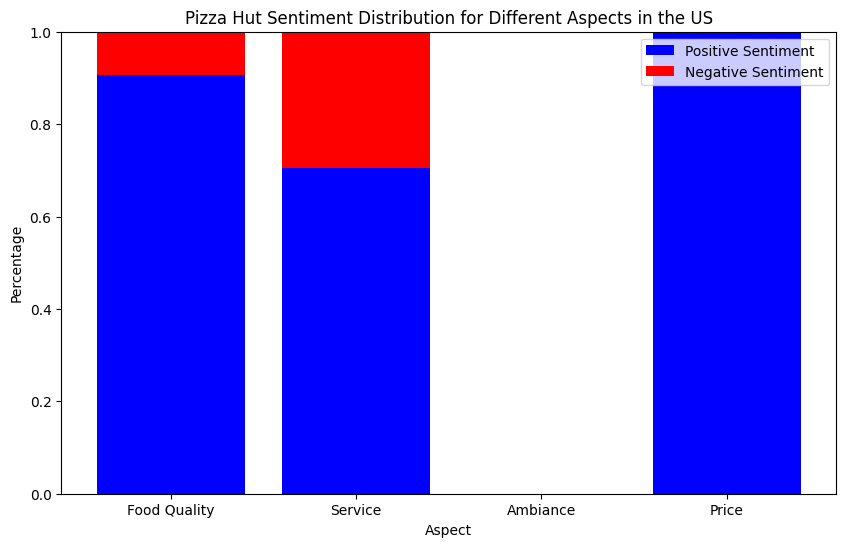

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Positive and negative sentiment words
positive_words = {'good', 'excellent', 'delicious', 'friendly', 'efficient', 'great', 'helpful', 'quick', 'fast', 'value', 'cheap', 'clean', 'friendly', 'professional', 'amazing'}
negative_words = {'bad', 'horrible', 'tasteless', 'rude', 'slow', 'terrible', 'expensive'}

# Function to calculate sentiment distribution for each aspect
def calculate_sentiment_distribution(keywords_freq, aspect):
    positive_sentiment = sum([freq for word, freq in keywords_freq if word in positive_words])
    negative_sentiment = sum([freq for word, freq in keywords_freq if word in negative_words])
    total = positive_sentiment + negative_sentiment

    if total == 0:
        return 0, 0

    positive_percentage = positive_sentiment / total
    negative_percentage = negative_sentiment / total
    return positive_percentage, negative_percentage

# Calculate sentiment distribution for each aspect
food_quality_positive, food_quality_negative = calculate_sentiment_distribution(food_quality_keywords_freq, 'Food Quality')
service_positive, service_negative = calculate_sentiment_distribution(service_keywords_freq, 'Service')
ambiance_positive, ambiance_negative = calculate_sentiment_distribution(ambiance_keywords_freq, 'Ambiance')
price_positive, price_negative = calculate_sentiment_distribution(price_keywords_freq, 'Price')

# Create a DataFrame to store the results
sentiment_df1 = pd.DataFrame({
    'Aspect': ['Food Quality', 'Service', 'Ambiance', 'Price'],
    'Positive Sentiment': [food_quality_positive, service_positive, ambiance_positive, price_positive],
    'Negative Sentiment': [food_quality_negative, service_negative, ambiance_negative, price_negative]
})

# Display the DataFrame
print(sentiment_df1)

# Plot sentiment distribution for all aspects
plt.figure(figsize=(10, 6))
plt.bar(sentiment_df1['Aspect'], sentiment_df1['Positive Sentiment'], color='blue', label='Positive Sentiment')
plt.bar(sentiment_df1['Aspect'], sentiment_df1['Negative Sentiment'], color='red', bottom=sentiment_df1['Positive Sentiment'], label='Negative Sentiment')
plt.xlabel('Aspect')
plt.ylabel('Percentage')
plt.title('Pizza Hut Sentiment Distribution for Different Aspects in the US')
plt.legend()
plt.ylim(0, 1)
plt.show()


In [ ]:
# Calculate the total count of keywords
total_keywords_count = len(food_quality_keywords_freq) + len(service_keywords_freq) + len(ambiance_keywords_freq) + len(price_keywords_freq)

# Calculate the percentage of keywords for each aspect
food_quality_percentage = (len(food_quality_keywords_freq) / total_keywords_count) * 100
service_percentage = (len(service_keywords_freq) / total_keywords_count) * 100
ambiance_percentage = (len(ambiance_keywords_freq) / total_keywords_count) * 100
price_percentage = (len(price_keywords_freq) / total_keywords_count) * 100

# Print the percentage of keywords for each aspect
print("Food Quality Percentage:", food_quality_percentage, "%")
print("Service Percentage:", service_percentage, "%")
print("Ambiance Percentage:", ambiance_percentage, "%")
print("Price Percentage:", price_percentage, "%")

Food Quality Percentage: 43.47826086956522 %
Service Percentage: 47.82608695652174 %
Ambiance Percentage: 0.0 %
Price Percentage: 8.695652173913043 %


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare your data (assuming df_egy has already been preprocessed)
X = df_US3['content']  # Independent variable
y = df_US3['Sentiment']  # Dependent variable

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Step 4: Train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7610619469026548

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        33
           1       0.75      1.00      0.86        80

    accuracy                           0.76       113
   macro avg       0.87      0.59      0.58       113
weighted avg       0.82      0.76      0.70       113

